# 8.2 Exercise: Time Series Modeling

In [18]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from statsmodels.tsa.statespace.sarimax import SARIMAX
from sklearn.metrics import mean_squared_error
import numpy as np

# Load the dataset
file_path = r'C:\Users\salin\OneDrive\Desktop\DSC630 Predictive Analytics\Week 8 - Time Series\us_retail_sales.csv'
data = pd.read_csv(file_path)

In [19]:
# Reshape the dataset for time series analysis
data_melted = data.melt(id_vars=['YEAR'], var_name='MONTH', value_name='SALES')
data_melted['DATE'] = pd.to_datetime(data_melted['YEAR'].astype(str) + data_melted['MONTH'], format='%Y%b')
data_melted = data_melted.sort_values(by='DATE')

## 1. Plot the data with proper labeling and make some observations on the graph

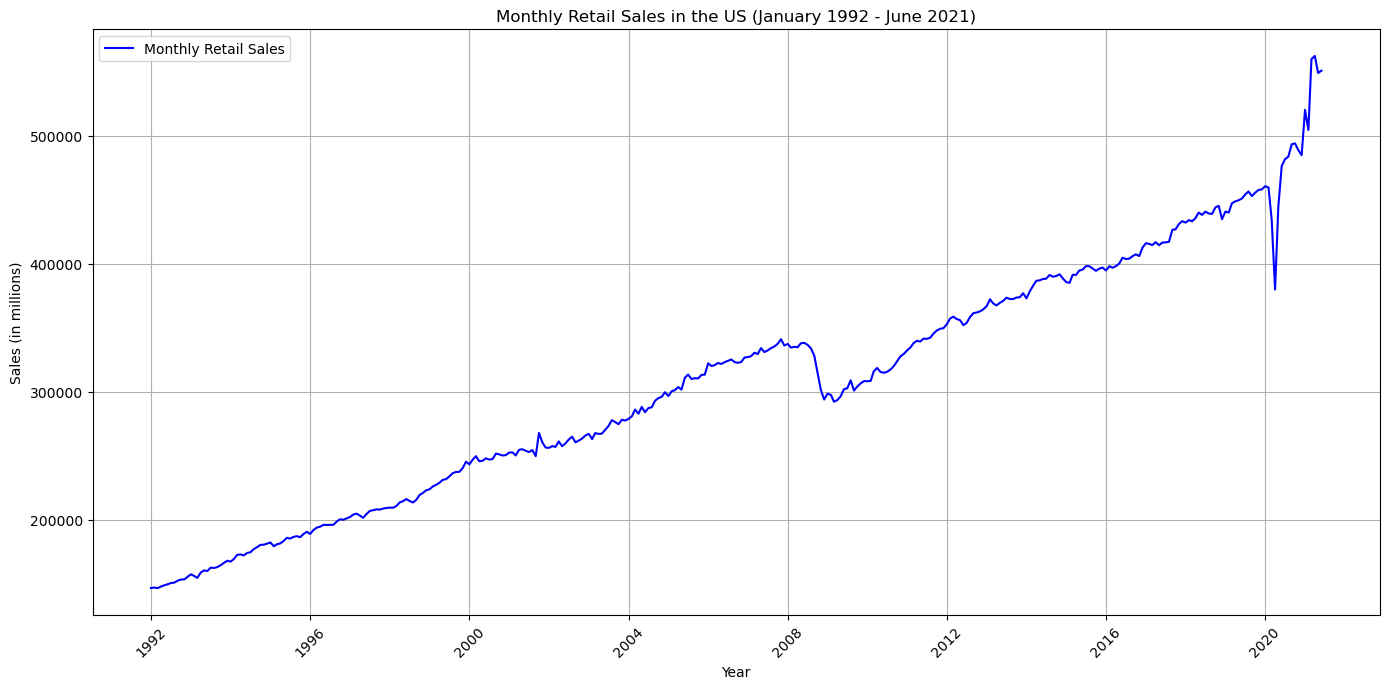

In [20]:
# Plot the time series data
plt.figure(figsize=(14, 7))
plt.plot(data_melted['DATE'], data_melted['SALES'], label='Monthly Retail Sales', color='blue')
plt.title('Monthly Retail Sales in the US (January 1992 - June 2021)')
plt.xlabel('Year')
plt.ylabel('Sales (in millions)')
plt.xticks(rotation=45)
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

In [21]:
# Prepare the data for modeling
sales_data = data_melted.set_index('DATE')['SALES'].asfreq('MS')

## 2. Split this data into a training and test set. Use the last year of data (July 2020 – June 2021) of data as your test set and the rest as your training set.

In [22]:
# Split the data into training and test sets
train_end = pd.Timestamp('2020-06-01')
test_start = pd.Timestamp('2020-07-01')
train_data = sales_data[:train_end]
test_data = sales_data[test_start:]


## 3. Use the training set to build a predictive model for the monthly retail sales.

In [23]:
# SARIMA Model Configuration
p, d, q = 1, 1, 1  # ARIMA parameters
P, D, Q, S = 1, 1, 1, 12  # Seasonal parameters

# Fit the SARIMA model
model = SARIMAX(train_data, order=(p, d, q), seasonal_order=(P, D, Q, S))
model_fit = model.fit(disp=False)


## 4. Use the model to predict the monthly retail sales on the last year of data.

In [24]:
# Predictions
predictions = model_fit.predict(start=test_data.index[0], end=test_data.index[-1])

# Handle NaN values in test data (if any)
test_data_filled = test_data.fillna(method='ffill')


## 5. Report the RMSE of the model predictions on the test set

In [25]:
# Calculate RMSE
rmse_filled = np.sqrt(mean_squared_error(test_data_filled, predictions))

# Display the RMSE
print(f'RMSE: {rmse_filled}')

RMSE: 59800.72211785932
